In [40]:
# start by importing the libraries and modules that we are going to be needing to build the Classifier

import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import itertools
import base64
import io

In [2]:
breeds = ["beagle", "bernese_mountain_dog", "doberman", "labrador_retriever", "siberian_husky"]

In [5]:
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (256, 256),
    "seed": 1,
    "validation_split": .2,
    "class_names": breeds
}

In [8]:
print("starting")
train = tf.keras.utils.image_dataset_from_directory(
    "images",
    subset="training",
    **args
)  # this will be the training data

test = tf.keras.utils.image_dataset_from_directory(
  "images",
  subset="validation",
    **args
) # and this is the data we test on
print("step finished successfully!")

starting
Found 926 files belonging to 5 classes.
Using 741 files for training.
Found 926 files belonging to 5 classes.
Using 185 files for validation.
step finished successfully!


In [9]:
print(train)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


In [10]:
first = train.take(1)
first # the first 32 images as take takes a batch that is the first 32 images from the dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [11]:
images, labels = list(first)[0]

# images will now be the first 32 images of the dataset
# labels will be the labels of those images

In [12]:
images  # this is how the images are represented by tensorflow

<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 17.658463 ,  26.107117 ,  18.948654 ],
         [ 25.686066 ,  24.405075 ,  20.66211  ],
         [ 29.847656 ,  24.580734 ,  21.669708 ],
         ...,
         [124.332245 , 121.332245 , 116.332245 ],
         [122.09987  , 119.09987  , 114.09987  ],
         [120.47656  , 117.47656  , 112.47656  ]],

        [[ 18.993622 ,  26.708206 ,  22.481903 ],
         [ 26.17189  ,  26.147278 ,  24.414856 ],
         [ 29.454437 ,  22.608734 ,  22.083344 ],
         ...,
         [121.059235 , 118.059235 , 113.059235 ],
         [123.12695  , 120.12695  , 115.12695  ],
         [121.17383  , 118.17383  , 113.17383  ]],

        [[ 17.373474 ,  24.858932 ,  23.791443 ],
         [ 19.348282 ,  19.05922  ,  20.95375  ],
         [ 25.176407 ,  18.02797  ,  19.969376 ],
         ...,
         [123.03125  , 120.03125  , 115.03125  ],
         [124.5918   , 121.5918   , 116.5918   ],
         [122.63867  , 119.63867  , 114.63867

In [14]:
first_image = images[0]
first_image # Numpy array meaning we can subset it

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 17.658463,  26.107117,  18.948654],
        [ 25.686066,  24.405075,  20.66211 ],
        [ 29.847656,  24.580734,  21.669708],
        ...,
        [124.332245, 121.332245, 116.332245],
        [122.09987 , 119.09987 , 114.09987 ],
        [120.47656 , 117.47656 , 112.47656 ]],

       [[ 18.993622,  26.708206,  22.481903],
        [ 26.17189 ,  26.147278,  24.414856],
        [ 29.454437,  22.608734,  22.083344],
        ...,
        [121.059235, 118.059235, 113.059235],
        [123.12695 , 120.12695 , 115.12695 ],
        [121.17383 , 118.17383 , 113.17383 ]],

       [[ 17.373474,  24.858932,  23.791443],
        [ 19.348282,  19.05922 ,  20.95375 ],
        [ 25.176407,  18.02797 ,  19.969376],
        ...,
        [123.03125 , 120.03125 , 115.03125 ],
        [124.5918  , 121.5918  , 116.5918  ],
        [122.63867 , 119.63867 , 114.63867 ]],

       ...,

       [[201.      , 206.      , 212.      ],
        [202.

In [15]:
first_image[:3,:3,0]

# tf reads each image as three separate matrices -- each representing RGB in the image

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[17.658463, 25.686066, 29.847656],
       [18.993622, 26.17189 , 29.454437],
       [17.373474, 19.348282, 25.176407]], dtype=float32)>

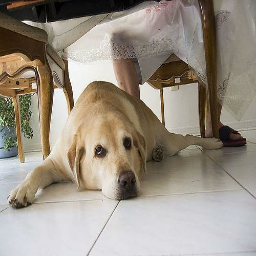

In [17]:
Image.fromarray(images[0].numpy().astype("uint8"))

# this is the first image!

In [18]:
labels[0]

# label is a vector!
# numpy=array([1., 0., 0., 0., 0.] if the dog was a beagle..etc

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 1., 0.], dtype=float32)>

In [19]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# this is performance optimization -- we are asking the program to load images in the memory (no need to access hard drive everytime)

In [22]:
model = Sequential([
  tf.keras.layers.Rescaling(1./255), # resclaing as NNs work better when numbers are between 0 to 1
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,3)), # building our Convolutional layer here with 16 different features (NN will build these features itself!)
  layers.Flatten(), # numerous matrices which are the output of CNN above will be converted into a single matrix
  layers.Dense(128, activation='relu'), # this DenseNN allows the model to learn complex patterns in the data, and converts output into predictions
  layers.Dense(len(breeds)) # this is the layer that will finally make the prediction!
])

# this is our sequential model!

C:\Users\alimu\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model must be compiled before we want to use it to make any prediction

In [24]:
history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)

# Now we can fit the model to the training dataset and validate it on the testing dataset -- overfitting or underfitting
# very solid accuracy

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1348s 57s/step - accuracy: 0.2168 - loss: 29.1298 - val_accuracy: 0.2649 - val_loss: 3.0987
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 736s 31s/step - accuracy: 0.4611 - loss: 1.8836 - val_accuracy: 0.3027 - val_loss: 1.7284
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1033s 44s/step - accuracy: 0.7927 - loss: 0.8451 - val_accuracy: 0.3297 - val_loss: 1.7828
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 669s 28s/step - accuracy: 0.9676 - loss: 0.2493 - val_accuracy: 0.3135 - val_loss: 2.3517
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 617s 26s/step - accuracy: 0.9966 - loss: 0.0548 - val_accuracy: 0.3189 - val_loss: 3.4740


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   134,217,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,656,849 (1.50 GB)

 Trainable params: 134,218,949 (512.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,437,900 (1.00 GB)

<AxesSubplot:>

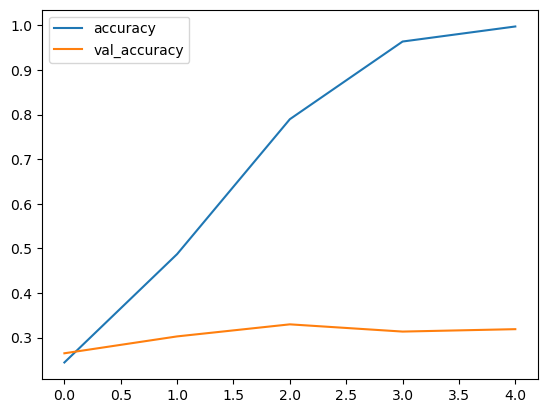

In [28]:
history_df = pd.DataFrame.from_dict(history.history)
history_df[["accuracy", "val_accuracy"]].plot()

# Here we visualize the training and validation accuracy over epochs using Dataframe

In [29]:
def train_model(network, epochs=5):
    model = Sequential(network)  # sequential model with the given nueral network in argument

    model.compile(optimizer='adam',  # compiles the model
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(  # Trains the model using the train dataset, validates on the test dataset, and runs for the specified number of epochs.
      train,
      validation_data=test,
      epochs=epochs
    )
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df, model  # Returns the training history DataFrame and the trained model.

In [30]:
network = [
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(breeds))
]  # Here we are defining the neural network architecture with layers including Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, and Dense layers.

history_df, model = train_model(network)

Epoch 1/5


C:\Users\alimu\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 530ms/step - accuracy: 0.1972 - loss: 2.7186 - val_accuracy: 0.2432 - val_loss: 1.6040
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.2324 - loss: 1.5849 - val_accuracy: 0.2865 - val_loss: 1.5331
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.3675 - loss: 1.4587 - val_accuracy: 0.3189 - val_loss: 1.4759
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.4697 - loss: 1.2498 - val_accuracy: 0.2919 - val_loss: 1.5197
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 372ms/step - accuracy: 0.5970 - loss: 1.0124 - val_accuracy: 0.3189 - val_loss: 2.4114


<AxesSubplot:>

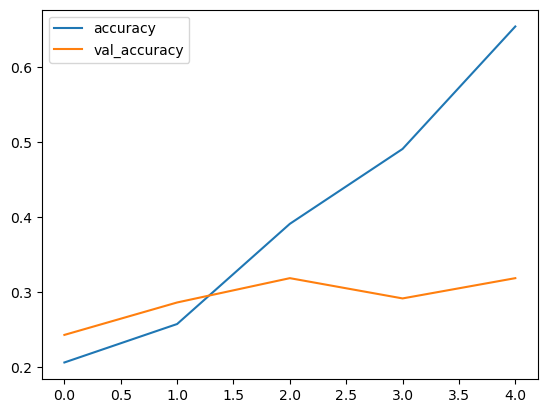

In [31]:
history_df[["accuracy", "val_accuracy"]].plot()

In [32]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", seed=1),
      layers.RandomRotation(0.2, seed=1),
    layers.RandomZoom(0.2, seed=1),
  ]
)  # Defining a sequential data augmentation pipeline with random horizontal flip, random rotation, and random zoom transformations.


full_network = [
    data_augmentation
] + network
# Combining the data augmentation pipeline with the previously defined network architecture.

history_df, model = train_model(full_network, epochs=10)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 573ms/step - accuracy: 0.2901 - loss: 1.7443 - val_accuracy: 0.3243 - val_loss: 1.5014
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 475ms/step - accuracy: 0.2937 - loss: 1.5201 - val_accuracy: 0.3568 - val_loss: 1.4915
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 472ms/step - accuracy: 0.3521 - loss: 1.4368 - val_accuracy: 0.3946 - val_loss: 1.4601
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - accuracy: 0.4368 - loss: 1.4150 - val_accuracy: 0.2973 - val_loss: 1.4787
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 468ms/step - accuracy: 0.4009 - loss: 1.3810 - val_accuracy: 0.3297 - val_loss: 1.4963
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 459ms/step - accuracy: 0.4155 - loss: 1.3952 - val_accuracy: 0.3081 - val_loss: 1.4970
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 463ms/step - accuracy: 0.4662 - loss: 1.3092 - val_accuracy: 0.3297 - val_loss: 1.4644
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 484ms/step - accuracy: 0.4461 - loss: 1.3027 - val_accu

<AxesSubplot:>

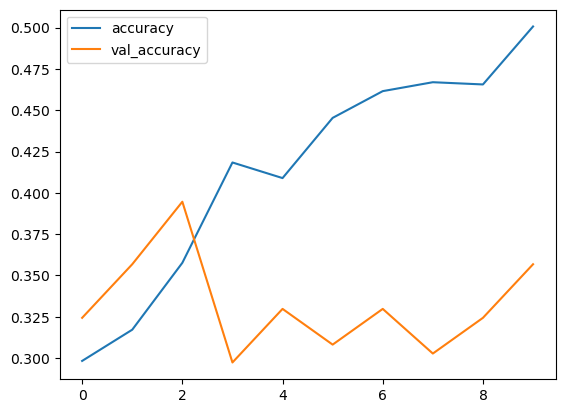

In [33]:
history_df[["accuracy", "val_accuracy"]].plot()

In [35]:
preds = model.predict(test)
predicted_class = np.argmax(preds, axis=1)  # Getting the class with the highest probability for each prediction
actual_labels = np.concatenate([y for x, y in test], axis=0)  # Concatenating the actual labels from the test dataset

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 352ms/step


In [36]:
actual_image = [x.numpy().astype("uint8") for x, y in test]  # Converting the test images to numpy arrays of type uint8
actual_image = list(itertools.chain.from_iterable(actual_image))  # "flattening" the list of images
actual_image = [Image.fromarray(a) for a in actual_image]  # Converting numpy arrays to PIL Image objects

In [37]:
actual_class = np.argmax(actual_labels, axis=1)
# this gets the actual class labels

In [38]:
pred_df = pd.DataFrame(zip(predicted_class, actual_class, actual_image), columns=["prediction", "actual", "image"])
# Creating a DataFrame with predictions, actual labels, and images

In [39]:
pred_df["prediction"] = pred_df["prediction"].apply(lambda x: breeds[x])  # Maps predicted class indices to breed names
pred_df["actual"] = pred_df["actual"].apply(lambda x: breeds[x])  # Maps actual class indices to breed names.

,prediction,actual,image
0,beagle,labrador_retriever,
1,beagle,bernese_mountain_dog,
2,bernese_mountain_dog,bernese_mountain_dog,
3,beagle,doberman,
4,beagle,labrador_retriever,
5,labrador_retriever,labrador_retriever,
6,beagle,beagle,
7,siberian_husky,beagle,
8,siberian_husky,siberian_husky,
9,bernese_mountain_dog,doberman,

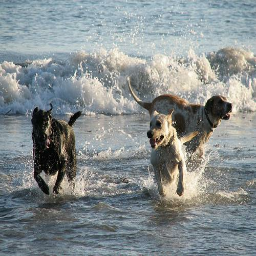
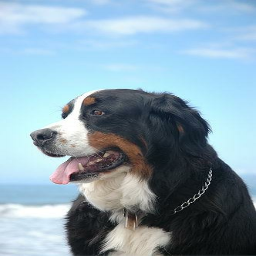
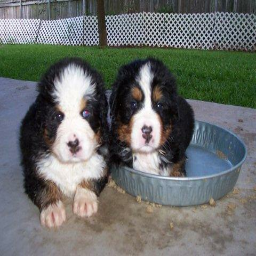
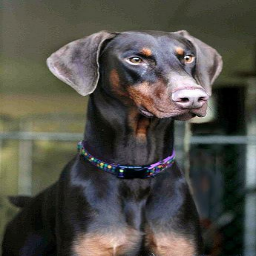
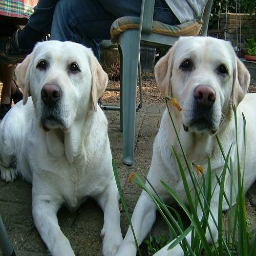
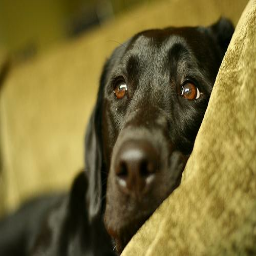
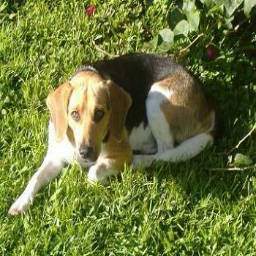
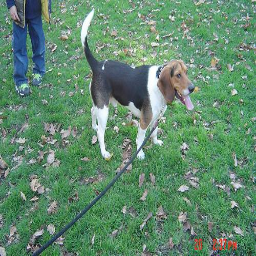
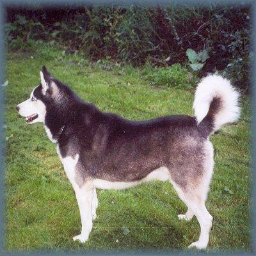
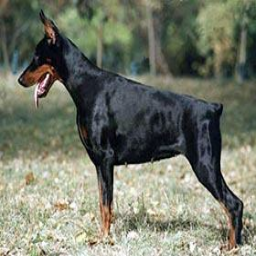

In [41]:
def image_formatter(img):  # this function is reponsible for formating images for display in HTML
    with io.BytesIO() as buffer:
        img.save(buffer, 'png')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        return f'<img src="data:image/jpeg;base64,{img_str}">'

pred_df.head(10).style.format({'image': image_formatter})  # formats the first 10 rows of pred_df to display images using the image_formatter function.